In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

The following function generates a set of all possible combinations of n binary inputs. It also generates all possible target binary variables. In other words, it generates all possible logical functions given n inputs and 1 output (e.g., AND, OR, XOR).

In [2]:
import itertools as it

def make_binary_data(n_inputs):
  X = list(it.product((0,1), repeat=n_inputs))
  Y = list(it.product((0,1), repeat=2**n_inputs))
  Y = Y[1:-1]
  return X, Y

In [4]:
X, Y = make_binary_data(2)

X is all four possible instances of binary inputs in two dimensions. The rows in Y represent all possible logic functions (AND, OR, XOR, etc) given four binary outputs (other than single class outputs such as [0,0,0,0]).

In [5]:
X

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [6]:
Y

[(0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0)]

The function below will train and test the Perceptron's ability to classify each of the 14 logical functions (AND, OR, XOR, etc) and returns the accuracy measured as proportion correct.

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

def test_all_y(X, Y):
  r = []
  per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=22)
  for y_i in Y:
    per_clf.fit(X, y_i)
    y_pred = per_clf.predict(X)
    r.append(accuracy_score(y_i, y_pred))
  return r

In [7]:
results = test_all_y(X, Y)

We can see the Perceptron does pretty well, scoring 92.86% on average across the 14 logical functions.

In [8]:
import numpy as np
np.mean(results)

0.9285714285714286

To perform some simple feature engineering, we can add the interaction of both input variables.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X = poly.fit_transform(X)

In [10]:
X

array([[0., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 1., 1.]])

In [11]:
results_int = test_all_y(X, Y)

Now we can see the Perceptron solves all 14 logical functions.

In [12]:
np.mean(results_int)

1.0

The plot below shows the performance on each of the 14 logical functions.

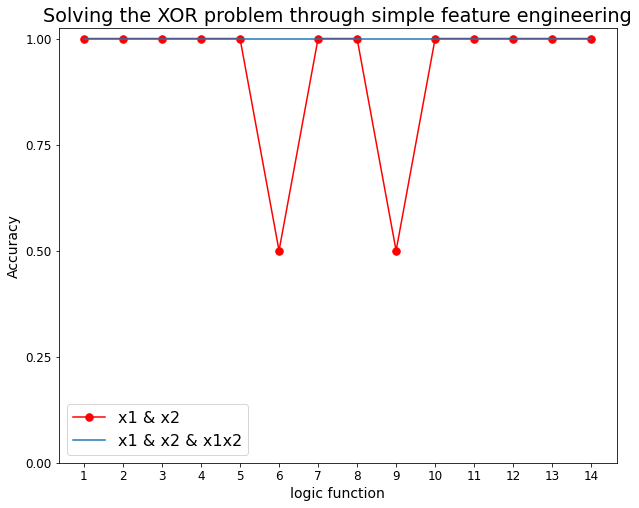

In [13]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
plt.plot(list(range(1, len(Y)+1)), results,"r.-", markersize=15, label="x1 & x2")
plt.plot(list(range(1, len(Y)+1)), results_int, label="x1 & x2 & x1x2")

plt.title("Solving the XOR problem through simple feature engineering")
plt.xlabel("logic function")
plt.ylabel("Accuracy")

plt.xticks(list(range(1, len(Y)+1)))
plt.yticks([0, 0.25,0.5, 0.75, 1])

plt.legend(loc="lower left")

plt.show()


The results above show that in 2 of 14 logic functions, the Perceptron fails to converge on a solution that allows it to properly classifiy each instance. This is because these 2 logic functions are non-linearlly seperable (XOR and XNOR).

However, by some very simple feature engineering (including an interaction term), the model is able to properly classify all 14 logical functions with no change in model architecture (i.e., adding a hidden layer).


We can repeat the same experiment but with 3 input variables:

In [14]:
X, Y = make_binary_data(3)

In [15]:
X

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [16]:
Y

[(0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 1),
 (0, 0, 0, 0, 1, 0, 1, 0),
 (0, 0, 0, 0, 1, 0, 1, 1),
 (0, 0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 0, 1, 1, 1, 0),
 (0, 0, 0, 0, 1, 1, 1, 1),
 (0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 1),
 (0, 0, 0, 1, 0, 0, 1, 0),
 (0, 0, 0, 1, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1, 0, 1),
 (0, 0, 0, 1, 0, 1, 1, 0),
 (0, 0, 0, 1, 0, 1, 1, 1),
 (0, 0, 0, 1, 1, 0, 0, 0),
 (0, 0, 0, 1, 1, 0, 0, 1),
 (0, 0, 0, 1, 1, 0, 1, 0),
 (0, 0, 0, 1, 1, 0, 1, 1),
 (0, 0, 0, 1, 1, 1, 0, 0),
 (0, 0, 0, 1, 1, 1, 0, 1),
 (0, 0, 0, 1, 1, 1, 1, 0),
 (0, 0, 0, 1, 1, 1, 1, 1),
 (0, 0, 1, 0, 0, 0, 0, 0),
 (0, 0, 1, 0, 0, 0, 0, 1),
 (0, 0, 1, 0, 0, 0, 1, 0),
 (0, 0, 1, 0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0, 1, 0, 0),
 (0, 0, 1, 0, 0, 1, 0, 1),
 

In [17]:
results = test_all_y(X, Y)

In [18]:
np.mean(results)

0.8061023622047244

In [19]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X = poly.fit_transform(X)

In [20]:
results_int = test_all_y(X, Y)

In [21]:
np.mean(results_int)

0.9493110236220472

With three input variables the model originally performs about 80% accurate on the 254 logical functions (all possible logical functions where the target variable has more than one class).

By adding interactions variables, the model performs about 15% better wit no change in model architecture.